# Patch config dev tool

This notebook is used to develop the rework for the patch commander. Can also be used to check whether your patch config will result in the intended grid

# Imports

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Function

In [17]:
def plot_grid(config):
    image_size = config['image_size']
    patch_size = config['patch_size']
    write_size = config['write_size']
    overlap = config['overlap']
    offset = config['offset']
    center = config['center']

    plot_range = ((-patch_size[0], -patch_size[1]), (image_size[0] + patch_size[0], image_size[1] + patch_size[1]))
    plot_size = (plot_range[1][0] - plot_range[0][0], plot_range[1][1] - plot_range[0][1])
    plot_size_figsize = (plot_size[0] / 1000, plot_size[1] / 1000)

    step_size = (patch_size[0] - overlap[0], patch_size[1] - overlap[1])
    offset_corrected = tuple(o%ss for o, ss in zip(offset, step_size))
    # print(offset_corrected)

    fig, ax = plt.subplots(1, 1, figsize=plot_size_figsize)
    ax.set_xlim(plot_range[0][0], plot_range[1][0])
    ax.set_ylim(plot_range[0][1], plot_range[1][1])

    # plot the image
    ax.add_patch(patches.Rectangle((0, 0), image_size[0], image_size[1], linewidth=4, edgecolor='r', facecolor='none', alpha=1))
    plt.grid()
    # Invert the y-axis to flip the figure vertically like asap
    ax.invert_yaxis()

    if center:
        first_coord = [
        offset_corrected[0] - ((offset_corrected[0] + patch_size[0] // 2) // step_size[0]) * step_size[0],
        offset_corrected[1] - ((offset_corrected[1] + patch_size[1] // 2) // step_size[1]) * step_size[1]
    ]
    else:
        first_coord = [
        offset_corrected[0] - ((offset_corrected[0] + patch_size[0]) // step_size[0]) * step_size[0],
        offset_corrected[1] - ((offset_corrected[1] + patch_size[1]) // step_size[1]) * step_size[1]
    ]
    # print(first_coord)
    max_i, max_j = (image_size[0], image_size[1]) if not center else (image_size[0] + patch_size[0]//2, image_size[1] + patch_size[1]//2)
    # print(max_i, max_j)

    range_i = list(range(first_coord[0], max_i, step_size[0]))
    range_j = list(range(first_coord[1], max_j, step_size[1]))

    # print(range_i)
    # print(range_j)
    assert offset in zip(range_i, range_j)

    for i in range_i:
        for j in range_j:
            chance = np.random.rand()       
            # print(i, j) 
            if center:
                patch = patches.Rectangle((i - patch_size[0]//2, j - patch_size[1]//2), patch_size[0], patch_size[1], linewidth=1, edgecolor='b', facecolor='b' if chance<0.8 else 'r', alpha=0.05)
                ax.add_patch(patch)
                if chance > 0.95 or [i, j] == first_coord:
                    patch = patches.Rectangle((i - patch_size[0]//2, j - patch_size[1]//2), patch_size[0], patch_size[1], linewidth=1, edgecolor='black', facecolor='none', alpha=1)
                    ax.add_patch(patch)
                if write_size:
                    patch = patches.Rectangle((i - write_size[0]//2, j - write_size[1]//2), write_size[0], write_size[1], linewidth=1, edgecolor='green', facecolor='none', alpha=1)
                    ax.add_patch(patch)
            else:
                patch = patches.Rectangle((i, j), patch_size[0], patch_size[1], linewidth=1, edgecolor='b', facecolor='b' if chance<0.8 else 'r', alpha=0.05)
                ax.add_patch(patch)
                if chance > 0.95 or [i, j] == first_coord:
                    patch = patches.Rectangle((i, j), patch_size[0], patch_size[1], linewidth=1, edgecolor='black', facecolor='none', alpha=1)
                    ax.add_patch(patch)
                if write_size:
                    patch = patches.Rectangle((i + (patch_size[0] - write_size[0])//2, j + (patch_size[1] - write_size[1])//2), write_size[0], write_size[1], linewidth=1, edgecolor='green', facecolor='none', alpha=1)
                    ax.add_patch(patch)
    #             patch = patches.Rectangle((i + (patch_size[0] - write_size[0])//2, j + (patch_size[1] - write_size[1])//2), write_size[0], write_size[1], linewidth=1, edgecolor='black', facecolor='none', alpha=1)
    #             ax.add_patch(patch)
    plt.show()
        

# Example configs without offset

## Center

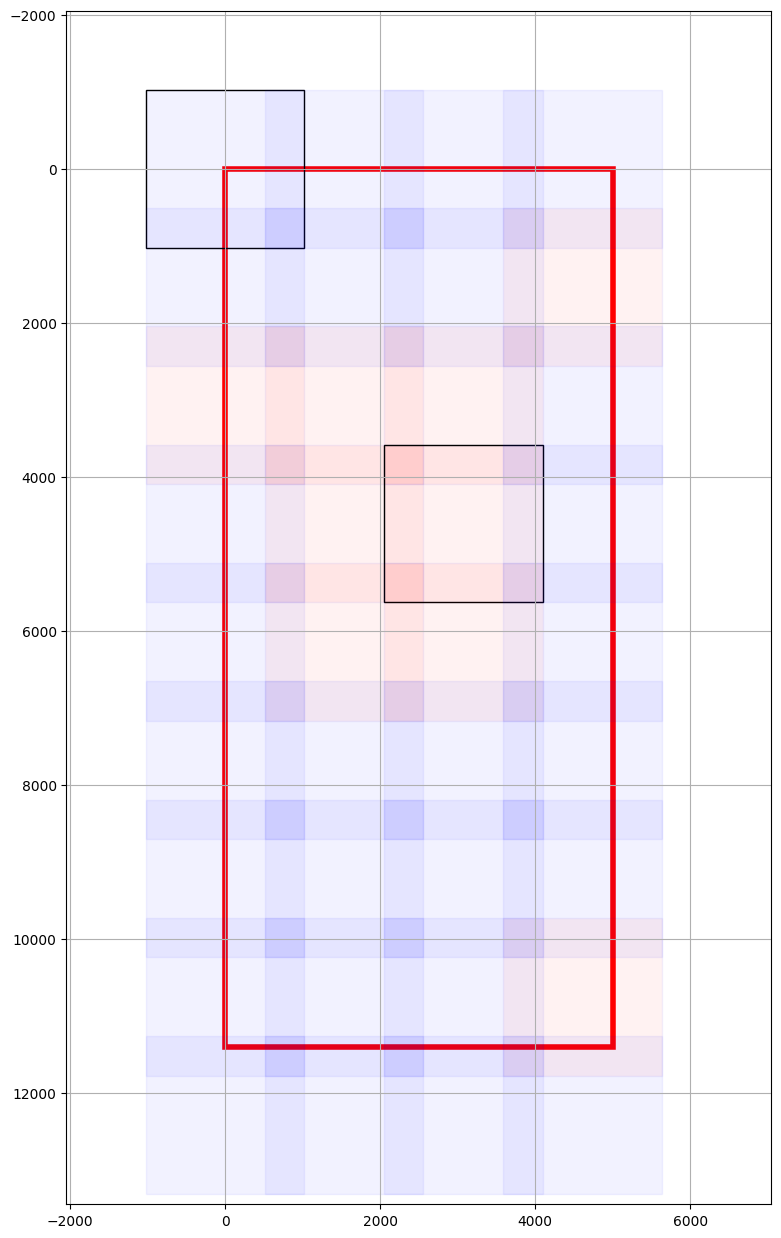

In [18]:
# Example usage:
image_size = (5000, 11400)
patch_size = (2048, 2048)
write_size = None #(2048 - 512, 2048 - 512)
overlap = (512, 512)
offset = (0, 0)
center = True  # Use center-based sampling

config = {'image_size': image_size, 'patch_size': patch_size, 'write_size': write_size, 'overlap': overlap, 'offset': offset, 'center': center}

plot_grid(config)

## Top left

Note that with the new approach the first patch is sampled partially outside the image, as it should

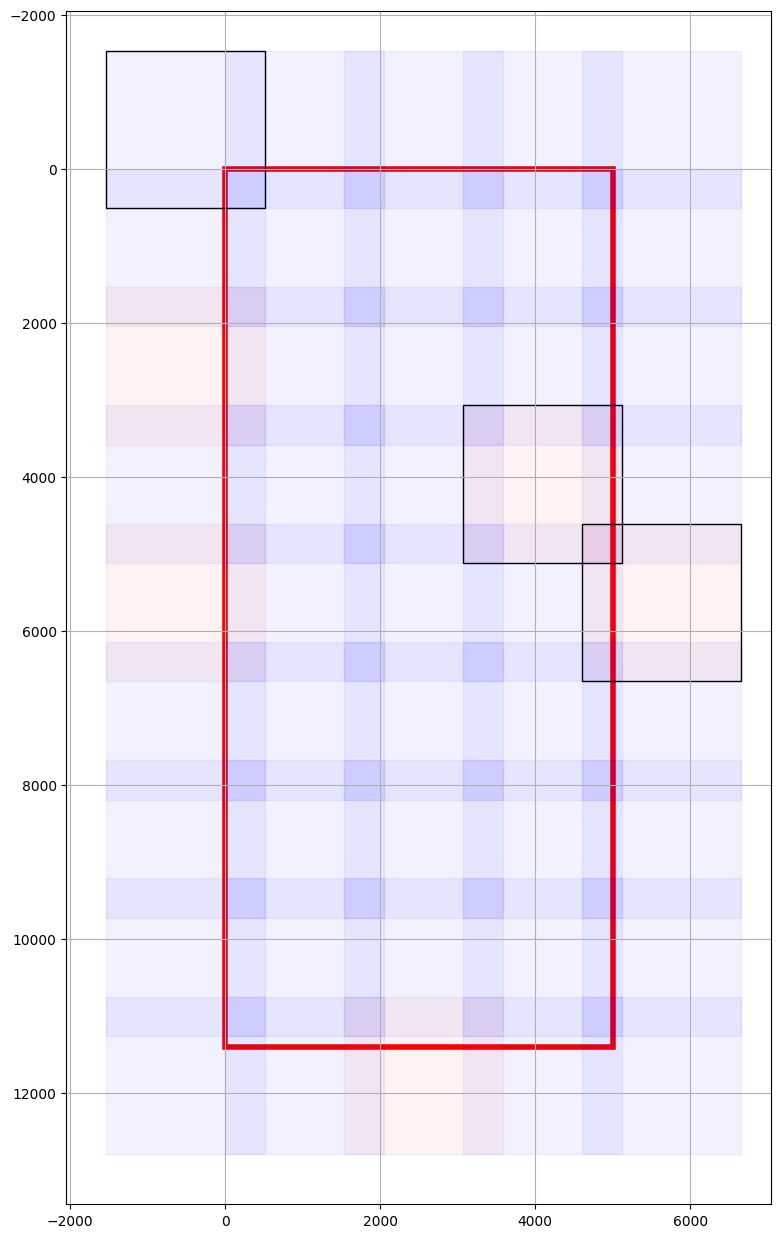

In [19]:
# Example usage:
image_size = (5000, 11400)
patch_size = (2048, 2048)
write_size = None #(2048 - 512, 2048 - 512)
overlap = (512, 512)
offset = (0, 0)
center = False  # Use center-based sampling

config = {'image_size': image_size, 'patch_size': patch_size, 'write_size': write_size, 'overlap': overlap, 'offset': offset, 'center': center}

plot_grid(config)

## nnUNet config with write shape
the write shape grid is depicted in green, this shows that the green grid covers the full image (the borders outside the write shape will be cropped off)

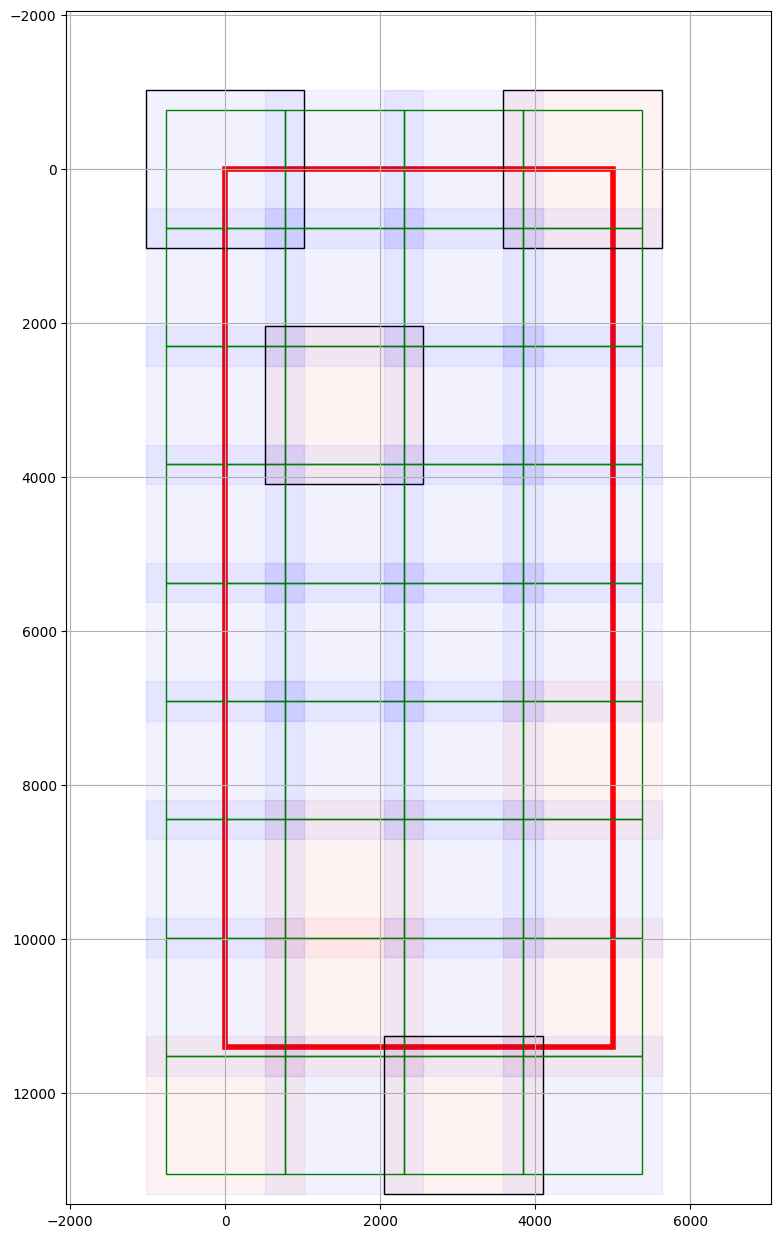

In [23]:
# Example usage:
image_size = (5000, 11400)
patch_size = (2048, 2048)
write_size = (2048 - 512, 2048 - 512)
overlap = (512, 512)
offset = (0, 0)
center = True  # Use center-based sampling

config = {'image_size': image_size, 'patch_size': patch_size, 'write_size': write_size, 'overlap': overlap, 'offset': offset, 'center': center}

plot_grid(config)

## Extreme tests

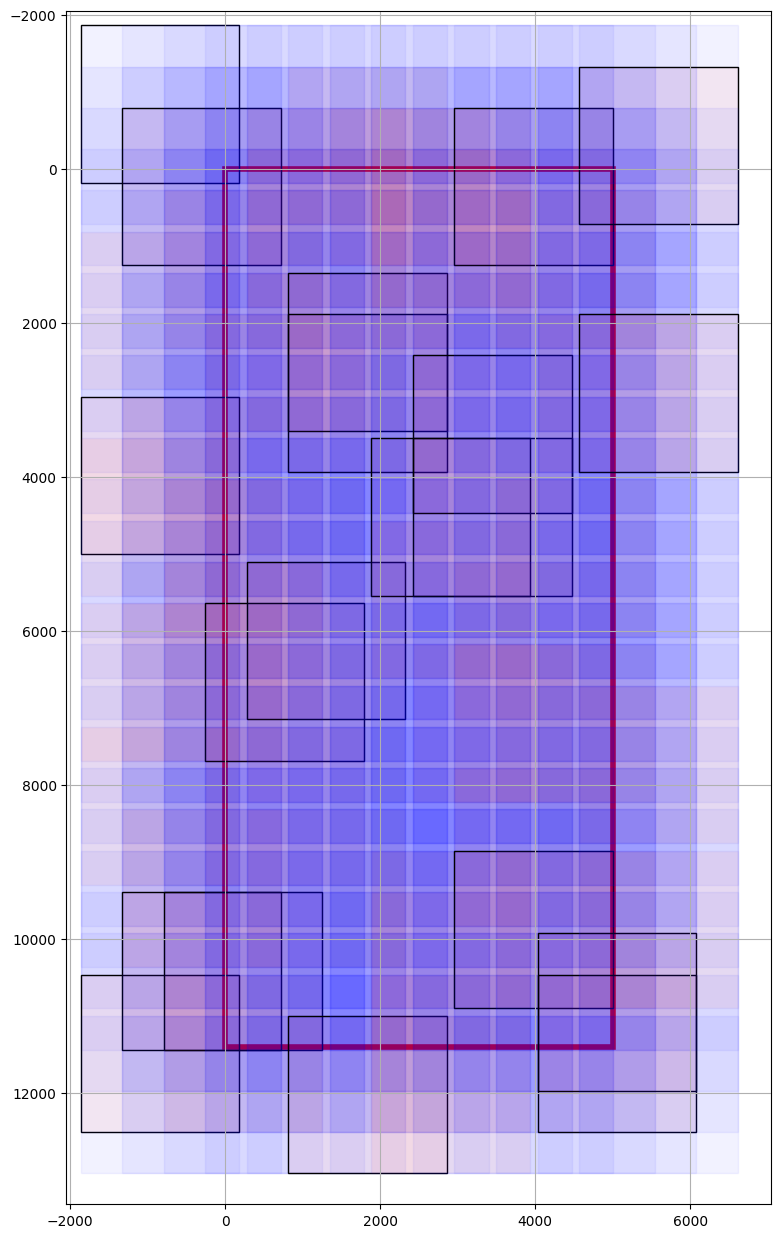

In [25]:
# Example usage:
image_size = (5000, 11400)
patch_size = (2048, 2048)
write_size = None
overlap = (512, 512)
overlap = (1512, 1512)
offset = (0, 0)
offset = (768, 768)
center = True  # Use center-based sampling

config = {'image_size': image_size, 'patch_size': patch_size, 'write_size': write_size, 'overlap': overlap, 'offset': offset, 'center': center}
plot_grid(config)

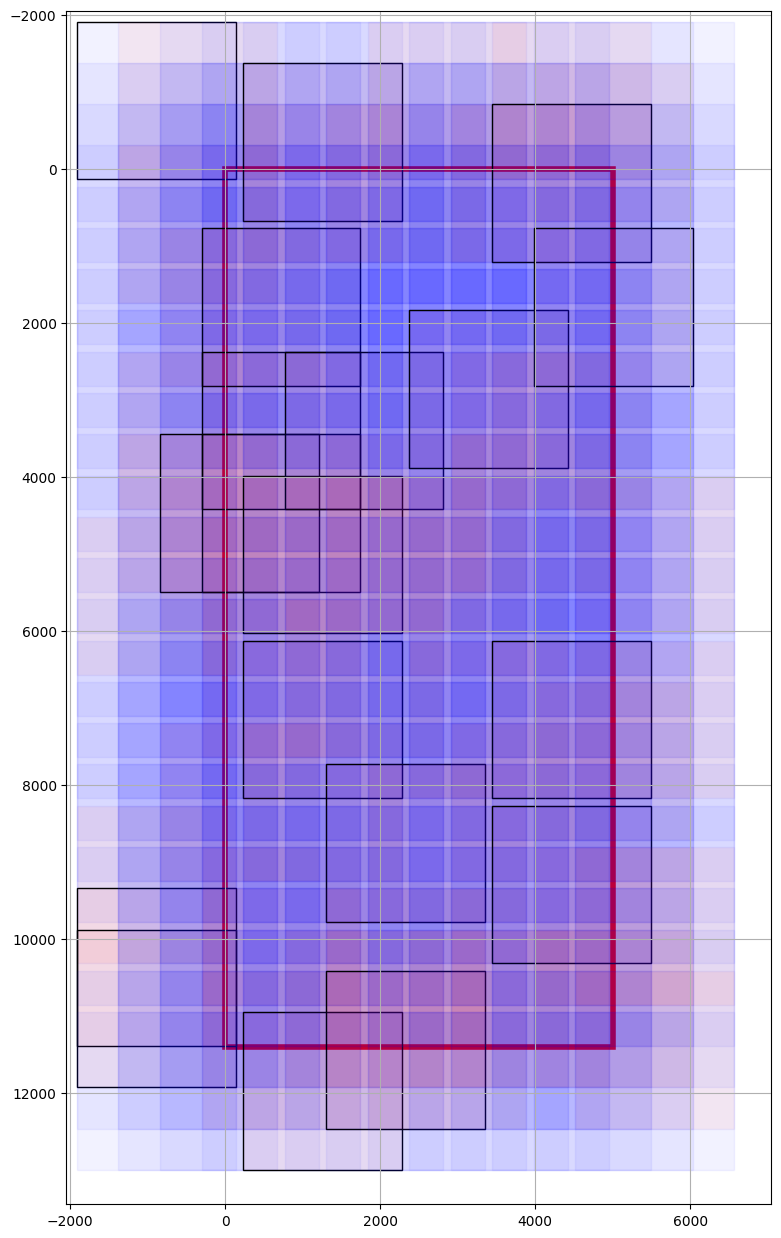

In [26]:
# Example usage:
image_size = (5000, 11400)
patch_size = (2048, 2048)
write_size = None
overlap = (512, 512)
overlap = (1512, 1512)
offset = (0, 0)
offset = (768, 768)
center = False  # Use center-based sampling

config = {'image_size': image_size, 'patch_size': patch_size, 'write_size': write_size, 'overlap': overlap, 'offset': offset, 'center': center}
plot_grid(config)